In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("precio_diadm.csv")
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [12]:
X=df[["carat","depth","table","x","y","z"]]
y=df["cut"]

In [13]:
x_train, x_temp, y_train, y_temp = train_test_split(X,y,test_size=0.4,train_size=0.6)
x_test, x_eval, y_test, y_eval = train_test_split(x_temp,y_temp,test_size = 0.5,train_size =0.5)

In [14]:
#escalamiento de los datos
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train) 
x_eval = scaler.transform(x_eval) 
x_test = scaler.transform(x_test) 

In [15]:
model = GaussianNB().fit(x_train,y_train) 
print (str(model.classes_))
print (y)

['Fair' 'Good' 'Ideal' 'Premium' 'Very Good']
0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: object


In [16]:
print (str(model.predict_proba(x_eval)))
print (str(model.predict(x_eval)))

[[1.30556326e-03 7.60428659e-02 4.35711288e-02 4.88772409e-01
  3.90308033e-01]
 [4.06689211e-02 2.51246874e-01 3.91693603e-02 1.88660580e-01
  4.80254264e-01]
 [4.97434229e-05 4.67546019e-03 9.39870500e-01 1.03034084e-02
  4.51008879e-02]
 ...
 [1.69186280e-01 2.33687789e-01 7.83491882e-05 3.16368339e-01
  2.80679243e-01]
 [6.72523970e-03 9.08610560e-02 1.36314834e-01 4.29451290e-01
  3.36647580e-01]
 [5.54923696e-01 3.74918603e-01 8.38975997e-12 3.10263870e-02
  3.91313133e-02]]
['Premium' 'Very Good' 'Ideal' ... 'Premium' 'Premium' 'Fair']


[[ 140  146    4   12   18]
 [  61  189  138  178  416]
 [  17    1 3719  497  112]
 [  10   36  614 1825  258]
 [  19   91  892  896  499]]
              precision    recall  f1-score   support

        Fair       0.57      0.44      0.49       320
        Good       0.41      0.19      0.26       982
       Ideal       0.69      0.86      0.77      4346
     Premium       0.54      0.67      0.59      2743
   Very Good       0.38      0.21      0.27      2397

    accuracy                           0.59     10788
   macro avg       0.52      0.47      0.48     10788
weighted avg       0.55      0.59      0.56     10788



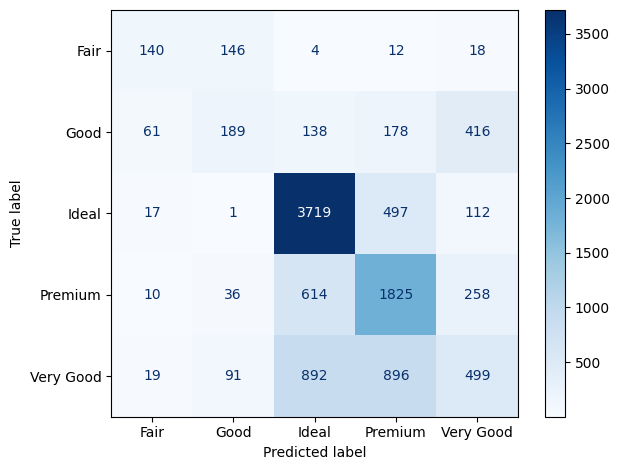

In [17]:
cm_1 = confusion_matrix(y_eval, model.predict(x_eval), labels=model.classes_)
#esta funcion construye el grafico de la matriz de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm_1,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.tight_layout()
#Graba el grafico en un archivo
plt.savefig("bayes-eval.png")
#te imprime por pantalla la matriz de confusion
print (str(cm_1))
#te imprime las metricas: recall, precision, accuracy
print(classification_report(y_eval, model.predict(x_eval)))

[[ 136  146    2   14   16]
 [  74  205  163  175  420]
 [  11    4 3637  501  102]
 [   9   33  614 1886  256]
 [  17   88  838  919  522]]
              precision    recall  f1-score   support

        Fair       0.55      0.43      0.48       314
        Good       0.43      0.20      0.27      1037
       Ideal       0.69      0.85      0.76      4255
     Premium       0.54      0.67      0.60      2798
   Very Good       0.40      0.22      0.28      2384

    accuracy                           0.59     10788
   macro avg       0.52      0.48      0.48     10788
weighted avg       0.56      0.59      0.56     10788



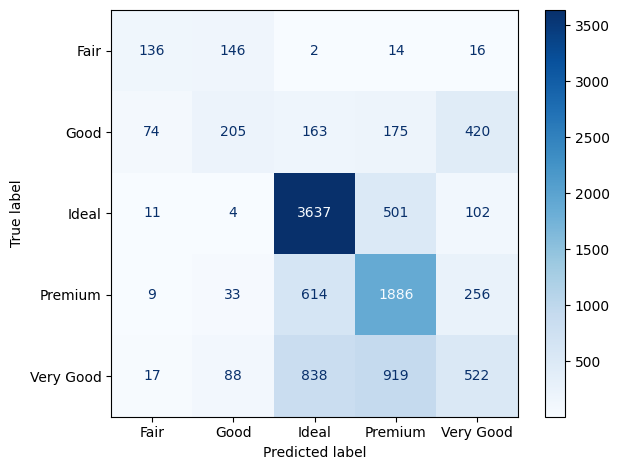

In [18]:
cm_2 = confusion_matrix(y_test, model.predict(x_test), labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.tight_layout()
plt.savefig("bayes-test.png")
print (str(cm_2))
print(classification_report(y_test, model.predict(x_test)))